Group 41 (Boris, Niklas, Philipp)

# Homework 3

This homework is designed to help you get more comfortable with linear transformations through visualization. Furthermore, we will consider the Cholesky decomposition for symmetric positive definite linear systems.
Let's get intialization out of the way, and then proceed.

In [1]:
import numpy as np
import scipy.linalg

import matplotlib.pyplot as plt         # plotting
import matplotlib.collections as clt    # plotting

%matplotlib inline

from IPython.core.display import HTML
HTML("""<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>""");

- - -

<div class="alert alert-info">

### Visualizing Transforms
</div>

A simple way to visualize linear transforms over two-dimensional or three-dimensional spaces is to consider their effect on a known geometry, e.g. a square, cube, circle, or sphere. Furthermore, depicting the images of basis vectors can also be helpful.

<div class="alert alert-success">

**Task:** Modify the function `visualize_transform_2d` below such that it draws the transformed rectangle and basis vectors corresponding to the matrix argument `M`.
</div>

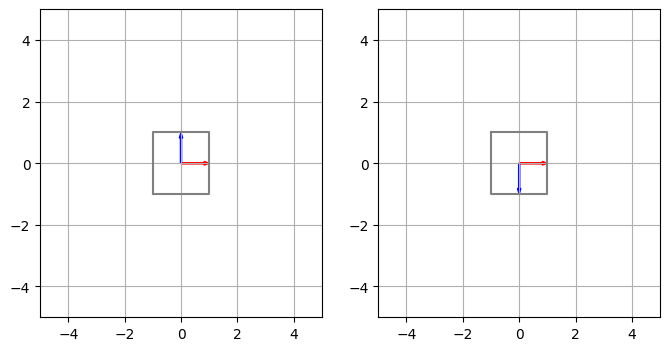

In [2]:
def visualize_transform_2d( ax, M ):
    """Visualize the effect of the linear transform described by M on the plot axes ax."""
    
    lines = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1]])
    
    basis = np.array([[1, 0], [0, 1]])
    
    # TODO: transform lines and basis using M
    
    lines = np.dot(M, lines)
    basis = np.dot(M, basis)
        
    ax.plot( lines[0,:], lines[1,:], '-', color="gray" )
    ax.arrow( 0, 0, basis[0][0], basis[1][0], color='red', width=.04, length_includes_head=True )
    ax.arrow( 0, 0, basis[0][1], basis[1][1], color='blue', width=.04, length_includes_head=True )
    
    ax.set_xlim( -5, 5 )
    ax.set_ylim( -5, 5 )
    ax.grid()
    
   
    
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

# visualize untransformed geometry
I = np.identity(2)   
visualize_transform_2d( ax0, I )

# visualize transformed geometry
M = np.array([[1, 0], [0, -1]])
visualize_transform_2d( ax1, M )

<div class="alert alert-success">
    
**Task**: Visualize the following types of transforms using the above method:
1. A reflection on the $x$-axis (mirroring with respect to $y$ axis).
2. A *shear transform*, which is given by matrices of the form $S_a := \begin{pmatrix} 1 & a \\ 0 & 1 \end{pmatrix}$ for $a = 2$.
3. A clockwise rotation around the origin with angle $\alpha = 45^\circ$.
</div>

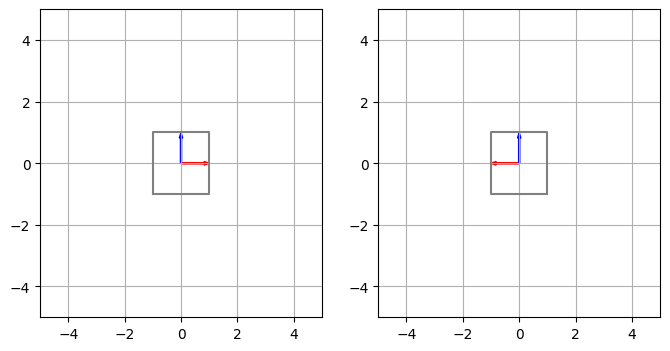

In [3]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

I = np.identity(2)   
visualize_transform_2d( ax0, I )

# TODO : set the matrix M for reflection

M = np.array([[-1, 0], [0, 1]])


visualize_transform_2d( ax1, M )

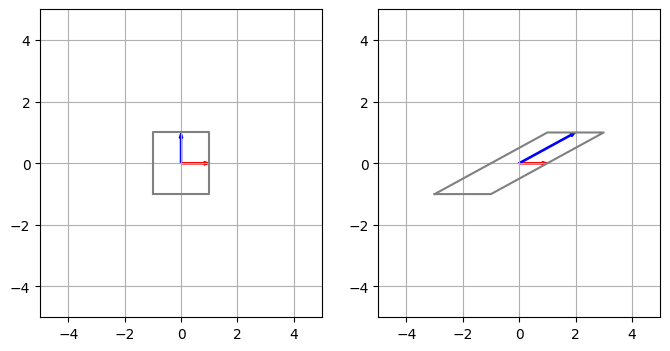

In [4]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

I = np.identity(2)   
visualize_transform_2d( ax0, I )

# TODO set the matric M shear with a = 2

M = np.array([[1, 2], [0, 1]])

visualize_transform_2d( ax1, M )

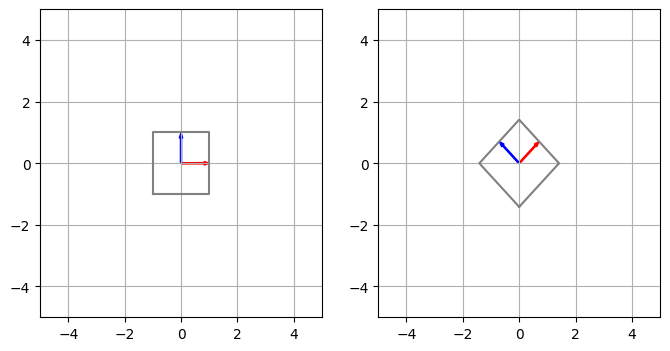

In [5]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

I = np.identity(2)   
visualize_transform_2d( ax0, I )

# TODO: set the matrix M for rotation

alpha = np.pi/4
M = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])

visualize_transform_2d( ax1, M )

<div class="alert alert-success">

**Task**: Use `visualize_transform_2d` to illustrate that matrix multiplication is -- in general -- not commutative, i.e. 

$$A\cdot B \neq B\cdot A.$$ 
for two $2\times 2$-matrices $A$, $B$. To show this, find two matrices $A$ and $B$ that do not commute, and visualize the respective transforms. You can choose $A$ and $B$ from the transforms in the previous task.
<div>

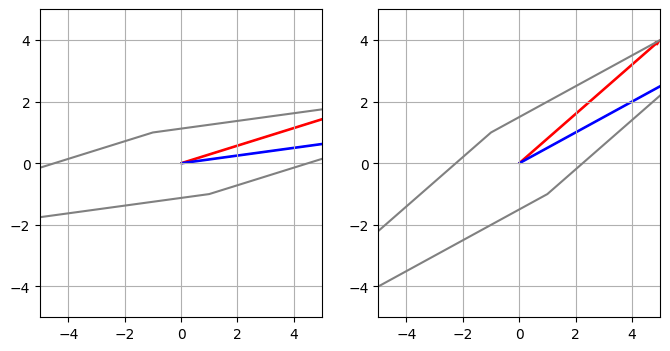

In [6]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))

#TODO: show that A*B is not equal to B*A by using "visualize_transform_2d"

A = np.array([[2, 3], [1, 0]])
B = np.array([[2, 1], [1, 2]])

I = np.matmul(A,B)

M = np.matmul(B,A)

visualize_transform_2d( ax0, I )
visualize_transform_2d( ax1, M )


<div class="alert alert-info">

### Cholesky Decomposition
</div>

As discussed in the course, a linear system with a symmetric positive definite system matrix $A\in\mathbb{R}^{n\times n}$ can be solved using the Cholesky decomposition, which we will try out in the following.

First, let's define a function to give us a random $n\times n$ system matrix $A$ and RHS $b$.

In [7]:
def random_spd_linear_system( n ):

    # generate a random RHS
    b = 2.0 * np.random.rand(n, 1) - 1.0

    # generate a random matrix and RHS
    M = 2.0 * np.random.rand(n, n) - 1.0
    A = np.matmul(M,np.transpose(M))
    return A, b
    
A, b = random_spd_linear_system( 50 )

To solve the linear system $A x = b$, we can first perform *Cholesky decomposition* $A= L L^T$, where $L$ is lower triangular, giving two triangular systems

$$ L y = b \qquad\text{and}\qquad L^T x = y,$$ 

whose solution $x$ is the solution of $Ax = b$.

<div class="alert alert-success">
    
**Task:** Complete the function `solve_linear_sytem_cholesky` below to return the solution of $Ax = b$.

Steps:
1. Compute Cholesky decomposition of $A = L L^T$
2. Solve $Ly = b$ using forward substitution.
3. Solve $L^Tx = y$ using backward substitution.
4. Return $x$ as the solution.

Hint: You may use `fwd_subs` and `bwd_subs` from the second Homework. You can check the correctness of your implementation by evaluating the residual vector $r = b-Ax$. 
</div>

In [8]:
def cholesky_decomp(M): 
    
    A = np.copy(M)
    n = A.shape[0]
    L = np.zeros_like(A)
    k=0
    
    for k in range(n):
        
        #Step 1 in Algorithm
        
        L[k, k] = np.sqrt(A[k, k])
        
        L[k+1:,k] = A[k, k + 1:] / L[k, k]
        
        #Step 2 in Algorithm
        
        A[k:,k:] = A[k:,k:] - np.outer(L[k:,k], L[k:,k])
        
    return L


def fwd_subs( a, b ):

    n = len(b)
    x = np.zeros(n)

    x[0] = b[0] / a[0, 0]
    
    for i in range(1, n):
        Sum = b[i]

        for j in range(i):
            Sum = Sum - a[i,j] * x[j]
            
        x[i] = Sum / a[i,i]      
    
    return x

def bwd_subs( a, b ):
        
    n = len(b)
    x = np.zeros(n)
    x[n-1] = b[n-1]/a[n-1, n-1]
    for i in range(n-1,-1,-1):
        Sum = b[i]
        for j in range(i+1,n):
            Sum = Sum - a[i,j] * x[j]
        x[i] = Sum / a[i,i]
    
    return x

def solve_linear_system_cholesky( A, b ):
    """Solve Ax = b using Cholesky method."""
    
    L = cholesky_decomp(A)
    
    LT = np.transpose(L)
    
    y = fwd_subs(L, b)
    
    x = bwd_subs(LT, y)
    
    return x
    
x = solve_linear_system_cholesky( A, b )
residual = b-np.matmul(A,x)
print(residual)





[[ 1.84297022e-14 -1.95616454e-01 -5.44953110e-01 ... -1.65542846e+00
  -9.12112382e-01 -1.24140618e+00]
 [ 1.95616454e-01  7.54951657e-15 -3.49336656e-01 ... -1.45981201e+00
  -7.16495927e-01 -1.04578973e+00]
 [ 5.44953110e-01  3.49336656e-01  6.52811138e-14 ... -1.11047535e+00
  -3.67159272e-01 -6.96453073e-01]
 ...
 [ 1.65542846e+00  1.45981201e+00  1.11047535e+00 ...  5.08482145e-14
   7.43316080e-01  4.14022278e-01]
 [ 9.12112382e-01  7.16495927e-01  3.67159272e-01 ... -7.43316080e-01
  -6.66133815e-15 -3.29293802e-01]
 [ 1.24140618e+00  1.04578973e+00  6.96453073e-01 ... -4.14022278e-01
   3.29293802e-01  2.24265051e-14]]
